In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [32]:
train_data = tf.keras.utils.image_dataset_from_directory(
    'strawberry',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    # validation_split=0.2,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    verbose=True,
)

Found 2049 files belonging to 2 classes.


In [33]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [34]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(train_data)

In [35]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [37]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
model = Sequential()
# model.add(resize_and_rescale)
# model.add(layers.InputLayer(input_shape=(128,128,3)))
layers.Resizing(128, 128)
layers.Rescaling(1./255)
model.add(layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(128,128,3)))
# model.add(layers.Resizing(128, 128))
# model.add(layers.Rescaling(1./255))
model.add(layers.MaxPooling2D((2, 2)))          
model.add(layers.Conv2D(64,  kernel_size = (3,3), activation='relu'))          
model.add(layers.Conv2D(64,  kernel_size = (3,3), activation='relu'))          
model.add(layers.MaxPooling2D((2, 2)))          
model.add(layers.Conv2D(64,  kernel_size = (3,3), activation='relu'))          
model.add(layers.Conv2D(64,  kernel_size = (3,3), activation='relu'))          
model.add(layers.MaxPooling2D((2, 2)))          
model.add(layers.Conv2D(128, (3, 3), activation='relu'))          
model.add(layers.Conv2D(128, (3, 3), activation='relu'))                           
model.add(layers.MaxPooling2D((2, 2)))               
model.add(Flatten())        
model.add(Dense(64,activation = 'relu'))          
model.add(Dense(32,activation = 'relu'))          
model.add(Dense(2,activation = 'softmax'))     

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 27, 27, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,898 (1.85 MB)

 Trainable params: 484,898 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(
    x=train_ds,
    
    validation_data=val_ds,
    verbose=1,
    epochs=36,
)

Epoch 1/36
103/103 ━━━━━━━━━━━━━━━━━━━━ 28s 205ms/step - accuracy: 0.7870 - loss: 0.5018 - val_accuracy: 0.9492 - val_loss: 0.1240
Epoch 2/36
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.9436 - loss: 0.1341 - val_accuracy: 0.9661 - val_loss: 0.0961
Epoch 3/36
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9493 - loss: 0.1099 - val_accuracy: 0.9379 - val_loss: 0.1602
Epoch 4/36
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9517 - loss: 0.1178 - val_accuracy: 0.9605 - val_loss: 0.0769
Epoch 5/36
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.9712 - loss: 0.0722 - val_accuracy: 0.9718 - val_loss: 0.0836
Epoch 6/36
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.9485 - loss: 0.1149 - val_accuracy: 0.9774 - val_loss: 0.0390
Epoch 7/36
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.9724 - loss: 0.0741 - val_accuracy: 0.9831 - val_loss: 0.0360
Epoch 8/36
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step - accuracy: 0.9835 - loss: 0

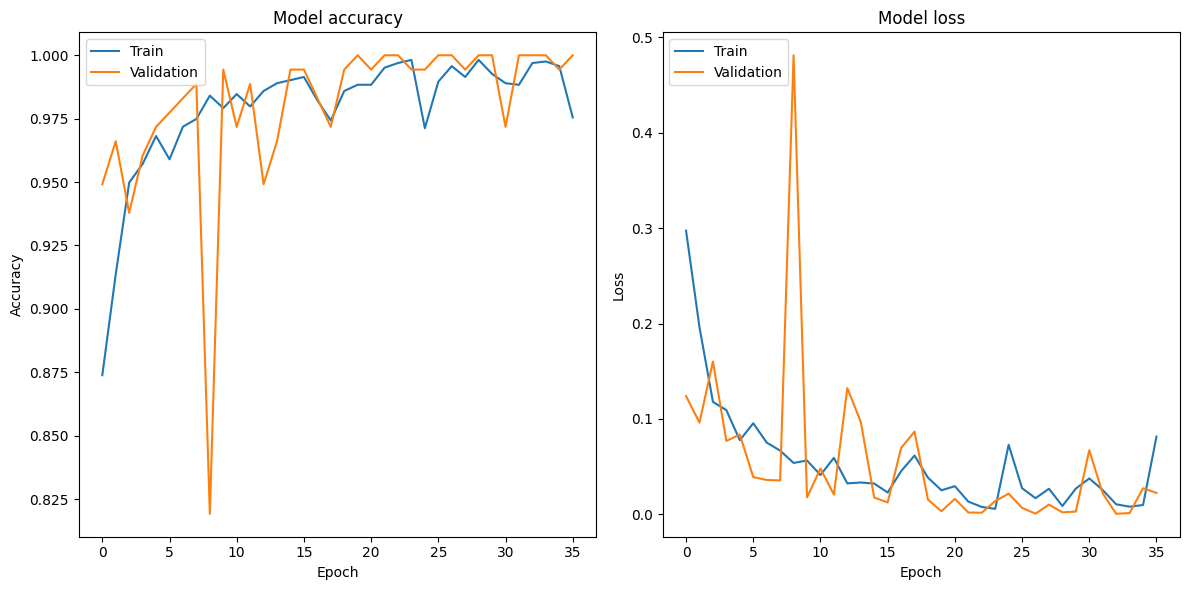

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [44]:
model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9970 - loss: 0.0214


[0.026149841025471687, 0.9955357313156128]

In [45]:
model.save("strawberry_model.keras")

In [46]:
import json
with open("strawberry_hist01.json","w") as f:
    json.dump(history.history , f)

In [47]:
class_names = train_data.class_names
class_names

['Strawberry___Leaf_scorch', 'Strawberry___healthy']